In [2]:
#csvファイルを読み込む
import csv
import sys
import os
import re
import datetime
import time
import numpy as np
import pandas as pd

In [3]:
calender_df = pd.read_csv('calender_data.csv', encoding='utf-8')
calender_df

,cdr_date,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name
0,2018-06-01,5,金,22,1,152,2018,True,False,NaN
1,2018-06-02,6,土,22,1,153,2018,True,True,NaN
2,2018-06-03,7,日,22,2,154,2018,False,True,NaN
3,2018-06-04,1,月,23,2,155,2018,False,False,NaN
4,2018-06-05,2,火,23,2,156,2018,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...
665,2020-03-27,5,金,13,4,87,2019,True,False,NaN
666,2020-03-28,6,土,13,4,88,2019,True,True,NaN
667,2020-03-29,7,日,13,5,89,2019,False,True,NaN
668,2020-03-30,1,月,14,5,90,2019,False,False,NaN


In [4]:
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cdr_date                 670 non-null    object
 1   dow                      670 non-null    int64 
 2   dow_name                 670 non-null    object
 3   woy                      670 non-null    int64 
 4   wom                      670 non-null    int64 
 5   doy                      670 non-null    int64 
 6   financial_year           670 non-null    int64 
 7   day_before_holiday_flag  670 non-null    bool  
 8   holiday_flag             670 non-null    bool  
 9   holiday_name             38 non-null     object
dtypes: bool(2), int64(5), object(3)
memory usage: 43.3+ KB


In [5]:
import pandas as pd

cm_data_df = pd.read_csv('cm_data.csv')
print(cm_data_df.head())
cm_data_df.info()

     cdr_date  cm_flg
0  2018-03-01       0
1  2018-03-02       0
2  2018-03-03       0
3  2018-03-04       0
4  2018-03-05       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cdr_date  762 non-null    object
 1   cm_flg    762 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.0+ KB


In [6]:

gt_service_name_df = pd.read_csv('gt_service_name.csv')
# Convert the 'week' column to datetime type
gt_service_name_df['cdr_date'] = pd.to_datetime(gt_service_name_df['week'])

# Set the 'week' column as the index
gt_service_name_df.set_index('cdr_date', inplace=True)

# Resample the dataframe to daily frequency and forward fill missing values
gt_service_df = gt_service_name_df.resample('D').ffill()

# Reset the index to make 'week' a column again
gt_service_df.reset_index(inplace=True)
gt_service_df.drop('week', axis=1, inplace=True)
# Print the updated dataframe
print(gt_service_df.info())
gt_service_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cdr_date    757 non-null    datetime64[ns]
 1   search_cnt  757 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.0 KB
None


,cdr_date,search_cnt
0,2018-03-04,49
1,2018-03-05,49
2,2018-03-06,49
3,2018-03-07,49
4,2018-03-08,49
...,...,...
752,2020-03-25,25
753,2020-03-26,25
754,2020-03-27,25
755,2020-03-28,25


In [7]:
regi_acc_get_data_df = pd.read_csv('regi_acc_get_data_transform.csv')
regi_acc_get_data_df.head()

,cdr_date,acc_get_cnt
0,2018-05-01,-0.926645
1,2018-05-02,-0.567495
2,2018-05-03,-1.050489
3,2018-05-04,-1.199103
4,2018-05-05,-1.360101


In [8]:
regi_call_data_df = pd.read_csv('regi_call_data_transform.csv')
regi_call_data_df.head()

,cdr_date,call_num
0,2018-06-01,183
1,2018-06-02,0
2,2018-06-03,0
3,2018-06-04,213
4,2018-06-05,143


In [9]:
regi_acc_get_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cdr_date     701 non-null    object 
 1   acc_get_cnt  701 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [10]:
regi_call_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cdr_date  670 non-null    object
 1   call_num  670 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.6+ KB


In [11]:
import pandas as pd
calender_df = pd.read_csv('calender_data.csv', encoding='utf-8')

cm_data_df = pd.read_csv('cm_data.csv')

regi_acc_get_data_df = pd.read_csv('regi_acc_get_data_transform.csv')

regi_call_data_df = pd.read_csv('regi_call_data_transform.csv')

gt_service_name_df = pd.read_csv('gt_service_name.csv')
# Convert the 'week' column to datetime type
gt_service_name_df['cdr_date'] = pd.to_datetime(gt_service_name_df['week'])

# Set the 'week' column as the index
gt_service_name_df.set_index('cdr_date', inplace=True)

# Resample the dataframe to daily frequency and forward fill missing values
gt_service_df = gt_service_name_df.resample('D').ffill()

# Reset the index to make 'week' a column again
gt_service_df.reset_index(inplace=True)
gt_service_df.drop('week', axis=1, inplace=True)

calender_df['cdr_date'] = pd.to_datetime(calender_df['cdr_date'])
regi_acc_get_data_df['cdr_date'] = pd.to_datetime(regi_acc_get_data_df['cdr_date'])
cm_data_df['cdr_date'] = pd.to_datetime(cm_data_df['cdr_date'])
gt_service_df['cdr_date'] = pd.to_datetime(gt_service_df['cdr_date'])
regi_call_data_df['cdr_date'] = pd.to_datetime(regi_call_data_df['cdr_date'])

# # List of dataframes
# dfs = [regi_call_data_df, regi_acc_get_data_df, calender_df, cm_data_df, gt_service_df]


# # Concatenate the dataframes vertically
# combined_df = pd.concat(dfs)
# #cdr_dateをdatetime型に変換
# combined_df['cdr_date'] = pd.to_datetime(combined_df['cdr_date'])
# # Print the combined dataframe
# print(combined_df.info())
# combined_df

In [12]:
import pandas as pd

merged_df = pd.merge(regi_call_data_df, regi_acc_get_data_df, on='cdr_date', how='outer')
merged_df = pd.merge(merged_df, calender_df, on='cdr_date', how='outer')
merged_df = pd.merge(merged_df, cm_data_df, on='cdr_date', how='outer')
merged_df = pd.merge(merged_df, gt_service_df, on='cdr_date', how='outer')

merged_df

,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt
0,2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2018-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,49.0
4,2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2020-03-27,127.0,0.534723,5.0,金,13.0,4.0,87.0,2019.0,True,False,NaN,1,25.0
758,2020-03-28,0.0,-0.220730,6.0,土,13.0,4.0,88.0,2019.0,True,True,NaN,1,25.0
759,2020-03-29,0.0,-0.641802,7.0,日,13.0,5.0,89.0,2019.0,False,True,NaN,1,20.0
760,2020-03-30,134.0,-0.307421,1.0,月,14.0,5.0,90.0,2019.0,False,False,NaN,1,NaN


In [13]:
start_date = '2018-06-01'
timestamp = pd.Timestamp(start_date)

end_date = '2020-03-31'


filtered_df = merged_df[(merged_df['cdr_date'] >= start_date) & (merged_df['cdr_date'] <= end_date)]
filtered_df['days_from_start'] = (filtered_df['cdr_date'] - timestamp).dt.days
filtered_df['day_before_holiday_flag'] = filtered_df['day_before_holiday_flag'].astype(int)
filtered_df['holiday_flag'] = filtered_df['holiday_flag'].astype(int)

filtered_df['holiday_name'] = filtered_df['holiday_name'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

dow_name_mapping = {'日': 1, '月': 2, '火': 3, '水': 4, '木': 5, '金': 6, '土': 7}
filtered_df['dow_name'] = filtered_df['dow_name'].map(dow_name_mapping)

filtered_df

C:\Users\81803\AppData\Local\Temp\ipykernel_23428\1682422103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['days_from_start'] = (filtered_df['cdr_date'] - timestamp).dt.days
C:\Users\81803\AppData\Local\Temp\ipykernel_23428\1682422103.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_before_holiday_flag'] = filtered_df['day_before_holiday_flag'].astype(int)
C:\Users\81803\AppData\Local\Temp\ipykernel_23428\1682422103.py:10: SettingWithCopyWarning: 
A value is trying to b

,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt,days_from_start
92,2018-06-01,183.0,-0.282652,5.0,6,22.0,1.0,152.0,2018.0,1,0,0,0,6.0,0
93,2018-06-02,0.0,-1.025720,6.0,7,22.0,1.0,153.0,2018.0,1,1,0,0,6.0,1
94,2018-06-03,0.0,-1.075258,7.0,1,22.0,2.0,154.0,2018.0,0,1,0,0,18.0,2
95,2018-06-04,213.0,-0.220730,1.0,2,23.0,2.0,155.0,2018.0,0,0,0,0,18.0,3
96,2018-06-05,143.0,-0.431266,2.0,3,23.0,2.0,156.0,2018.0,0,0,0,0,18.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2020-03-27,127.0,0.534723,5.0,6,13.0,4.0,87.0,2019.0,1,0,0,1,25.0,665
758,2020-03-28,0.0,-0.220730,6.0,7,13.0,4.0,88.0,2019.0,1,1,0,1,25.0,666
759,2020-03-29,0.0,-0.641802,7.0,1,13.0,5.0,89.0,2019.0,0,1,0,1,20.0,667
760,2020-03-30,134.0,-0.307421,1.0,2,14.0,5.0,90.0,2019.0,0,0,0,1,NaN,668


In [14]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 92 to 761
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cdr_date                 670 non-null    datetime64[ns]
 1   call_num                 670 non-null    float64       
 2   acc_get_cnt              670 non-null    float64       
 3   dow                      670 non-null    float64       
 4   dow_name                 670 non-null    int64         
 5   woy                      670 non-null    float64       
 6   wom                      670 non-null    float64       
 7   doy                      670 non-null    float64       
 8   financial_year           670 non-null    float64       
 9   day_before_holiday_flag  670 non-null    int32         
 10  holiday_flag             670 non-null    int32         
 11  holiday_name             670 non-null    int64         
 12  cm_flg                   670 non-null   

In [15]:
missing_search_cnt_rows = filtered_df[filtered_df['search_cnt'].isnull()].head(2)
missing_search_cnt_rows

,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt,days_from_start
760,2020-03-30,134.0,-0.307421,1.0,2,14.0,5.0,90.0,2019.0,0,0,0,1,NaN,668
761,2020-03-31,101.0,0.646183,2.0,3,14.0,5.0,91.0,2019.0,0,0,0,1,NaN,669


In [16]:
average_search_cnt_cm_flg_1 = filtered_df[filtered_df['cm_flg'] == 1]['search_cnt'].mean()
filtered_df['search_cnt'] = filtered_df['search_cnt'].fillna(average_search_cnt_cm_flg_1)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 92 to 761
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cdr_date                 670 non-null    datetime64[ns]
 1   call_num                 670 non-null    float64       
 2   acc_get_cnt              670 non-null    float64       
 3   dow                      670 non-null    float64       
 4   dow_name                 670 non-null    int64         
 5   woy                      670 non-null    float64       
 6   wom                      670 non-null    float64       
 7   doy                      670 non-null    float64       
 8   financial_year           670 non-null    float64       
 9   day_before_holiday_flag  670 non-null    int32         
 10  holiday_flag             670 non-null    int32         
 11  holiday_name             670 non-null    int64         
 12  cm_flg                   670 non-null   

C:\Users\81803\AppData\Local\Temp\ipykernel_23428\158541553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['search_cnt'] = filtered_df['search_cnt'].fillna(average_search_cnt_cm_flg_1)


In [17]:
#filtered_dfのEDA
filtered_df.describe()



,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt,days_from_start
count,670,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,2019-05-01 12:00:00,116.485075,0.034575,4.001493,3.998507,27.241791,3.114925,188.507463,2018.546269,0.328358,0.328358,0.056716,0.297015,36.644647,334.500000
min,2018-06-01 00:00:00,0.000000,-1.508715,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,2018-11-15 06:00:00,0.000000,-0.592264,2.000000,2.000000,12.250000,2.000000,84.250000,2018.000000,0.000000,0.000000,0.000000,0.000000,24.000000,167.250000
50%,2019-05-01 12:00:00,121.000000,-0.177384,4.000000,4.000000,29.000000,3.000000,198.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,36.000000,334.500000
75%,2019-10-15 18:00:00,161.000000,0.358244,6.000000,6.000000,40.750000,4.000000,281.750000,2019.000000,1.000000,1.000000,0.000000,1.000000,46.750000,501.750000
max,2020-03-31 00:00:00,757.000000,7.148030,7.000000,7.000000,52.000000,6.000000,365.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,100.000000,669.000000
std,NaN,119.924075,1.007193,2.004106,2.004106,15.417209,1.314602,108.248782,0.498227,0.469967,0.469967,0.231473,0.457285,17.750729,193.556624


C:\Users\81803\AppData\Local\Temp\ipykernel_23428\3671471774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['previous_acc_get_cnt'] = filtered_df['acc_get_cnt'].shift(1)
C:\Users\81803\AppData\Local\Temp\ipykernel_23428\3671471774.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['previous_search_cnt'] = filtered_df['search_cnt'].shift(1)


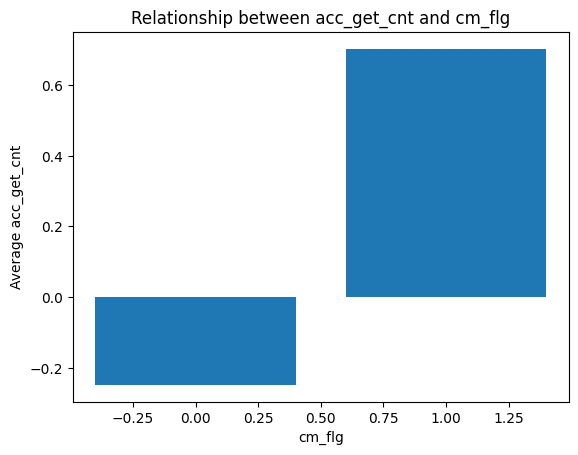

In [18]:
#acc_get_cntの分布
import matplotlib.pyplot as plt

# Filter the data for acc_get_cnt and cm_flg columns
# data = filtered_df[['acc_get_cnt', 'cm_flg']]

# Group the data by cm_flg and calculate the mean of acc_get_cnt for each group
grouped_data = filtered_df[['acc_get_cnt', 'cm_flg']].groupby('cm_flg')['acc_get_cnt'].mean()

filtered_df['previous_acc_get_cnt'] = filtered_df['acc_get_cnt'].shift(1)
filtered_df.loc[92, 'previous_acc_get_cnt'] = 0

filtered_df['previous_search_cnt'] = filtered_df['search_cnt'].shift(1)
filtered_df.loc[92, 'previous_search_cnt'] = 0
# Plot the data
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('cm_flg')
plt.ylabel('Average acc_get_cnt')
plt.title('Relationship between acc_get_cnt and cm_flg')
plt.show()

cm_flg
0    107.278132
1    138.276382
Name: call_num, dtype: float64


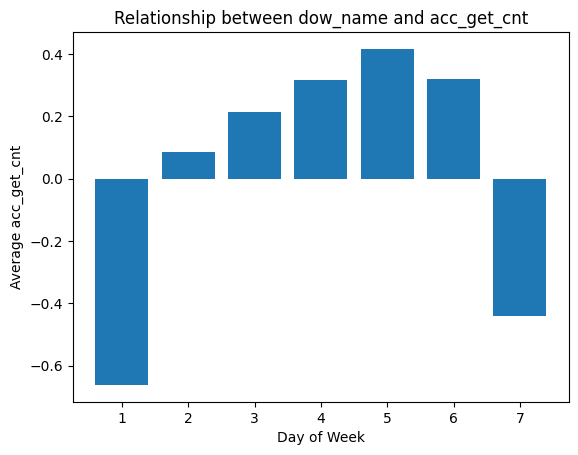

In [19]:
import matplotlib.pyplot as plt

# Group the data by dow_name and calculate the mean of acc_get_cnt
grouped_data = filtered_df.groupby('dow_name')['acc_get_cnt'].mean()

average_call_num = filtered_df.groupby('cm_flg')['call_num'].mean()
print(average_call_num)
# Create a bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Day of Week')
plt.ylabel('Average acc_get_cnt')
plt.title('Relationship between dow_name and acc_get_cnt')
plt.show()

In [20]:
regi_call_data_df = pd.read_csv('regi_call_data_transform.csv')
regi_call_data_df.head()

,cdr_date,call_num
0,2018-06-01,183
1,2018-06-02,0
2,2018-06-03,0
3,2018-06-04,213
4,2018-06-05,143


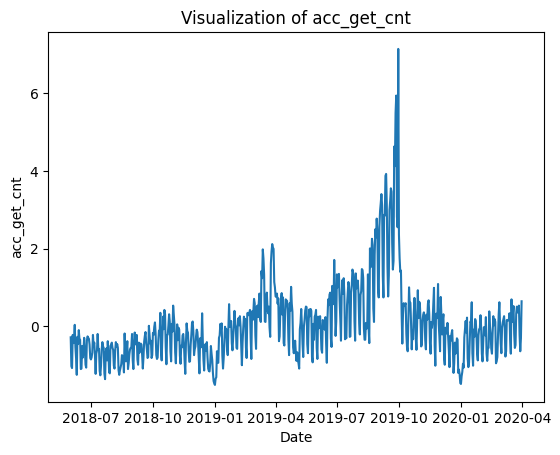

In [21]:
import matplotlib.pyplot as plt

# Plotting the acc_get_cnt variable
plt.plot(filtered_df['cdr_date'], filtered_df['acc_get_cnt'])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('acc_get_cnt')
plt.title('Visualization of acc_get_cnt')

# Display the plot
plt.show()



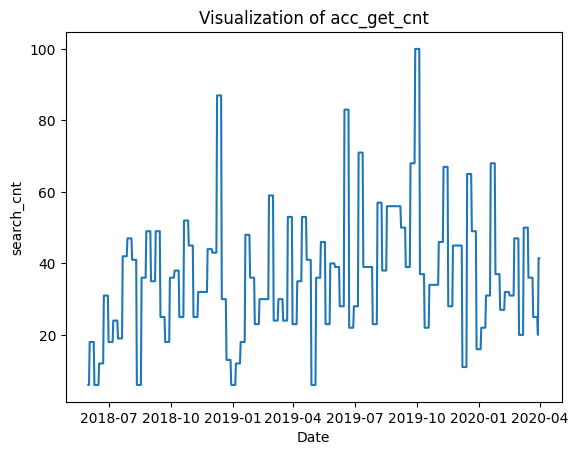

In [22]:
# Plotting the acc_get_cnt variable
plt.plot(filtered_df['cdr_date'], filtered_df['search_cnt'])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('search_cnt')
plt.title('Visualization of acc_get_cnt')

# Display the plot
plt.show()

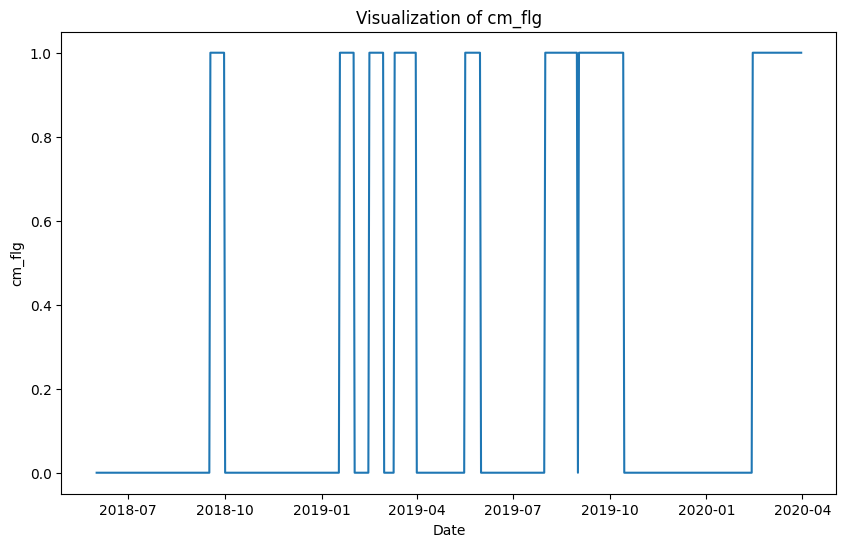

In [23]:
import matplotlib.pyplot as plt

# Plotting the cm_flg variable
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['cdr_date'], filtered_df['cm_flg'])
plt.title('Visualization of cm_flg')
plt.xlabel('Date')
plt.ylabel('cm_flg')
plt.show()

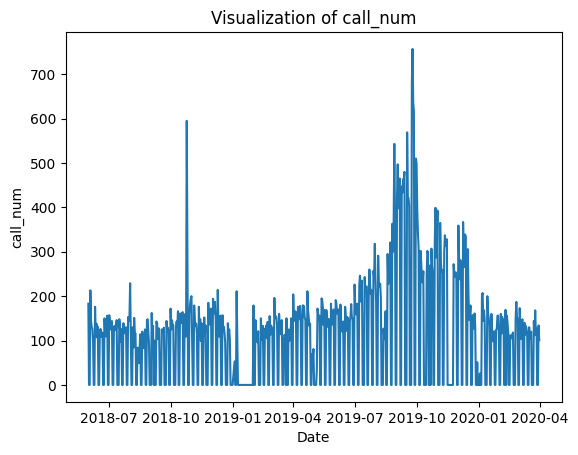

In [24]:
import matplotlib.pyplot as plt

# Plotting the call_num variable
plt.plot(filtered_df['cdr_date'], filtered_df['call_num'])
plt.xlabel('Date')
plt.ylabel('call_num')
plt.title('Visualization of call_num')
plt.show()

In [25]:
filtered_df.head()

,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt,days_from_start,previous_acc_get_cnt,previous_search_cnt
92,2018-06-01,183.0,-0.282652,5.0,6,22.0,1.0,152.0,2018.0,1,0,0,0,6.0,0,0.000000,0.0
93,2018-06-02,0.0,-1.025720,6.0,7,22.0,1.0,153.0,2018.0,1,1,0,0,6.0,1,-0.282652,6.0
94,2018-06-03,0.0,-1.075258,7.0,1,22.0,2.0,154.0,2018.0,0,1,0,0,18.0,2,-1.025720,6.0
95,2018-06-04,213.0,-0.220730,1.0,2,23.0,2.0,155.0,2018.0,0,0,0,0,18.0,3,-1.075258,18.0
96,2018-06-05,143.0,-0.431266,2.0,3,23.0,2.0,156.0,2018.0,0,0,0,0,18.0,4,-0.220730,18.0


In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 92 to 761
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cdr_date                 670 non-null    datetime64[ns]
 1   call_num                 670 non-null    float64       
 2   acc_get_cnt              670 non-null    float64       
 3   dow                      670 non-null    float64       
 4   dow_name                 670 non-null    int64         
 5   woy                      670 non-null    float64       
 6   wom                      670 non-null    float64       
 7   doy                      670 non-null    float64       
 8   financial_year           670 non-null    float64       
 9   day_before_holiday_flag  670 non-null    int32         
 10  holiday_flag             670 non-null    int32         
 11  holiday_name             670 non-null    int64         
 12  cm_flg                   670 non-null   

In [27]:
# filtered_df['search_cnt'] = filtered_df['search_cnt'].fillna(filtered_df['search_cnt'].mean())

In [28]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 小数第3位まで表示
%precision 3

'%.3f'

In [29]:
filtered_df.cm_flg.value_counts()

cm_flg
0    471
1    199
Name: count, dtype: int64

In [30]:
filtered_df.groupby("cm_flg")[["acc_get_cnt"]].mean()

,acc_get_cnt
cm_flg,
0,-0.247681
1,0.702629


In [31]:
filtered_df.groupby("cm_flg")[["search_cnt"]].mean()

,search_cnt
cm_flg,
0,34.611465
1,41.456853


In [32]:
filtered_df.groupby("cm_flg")[["call_num"]].mean()

,call_num
cm_flg,
0,107.278132
1,138.276382


In [33]:
import statsmodels.api as sm
X = sm.add_constant(filtered_df["cm_flg"])
y = filtered_df["acc_get_cnt"]

model = sm.OLS(y, X)
result = model.fit()

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            acc_get_cnt   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     152.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           9.38e-32
Time:                        00:06:29   Log-Likelihood:                -885.98
No. Observations:                 670   AIC:                             1776.
Df Residuals:                     668   BIC:                             1785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2477      0.042     -5.911      0.000      -0.330      -0.165
cm_flg         0.9503      0.077     12.361      0.000       0.799       1.101
==============================================================================
Omnibus:                      276.138   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.973
Skew:                           1.738   Prob(JB):                         0.00
Kurtosis:                       9.920   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

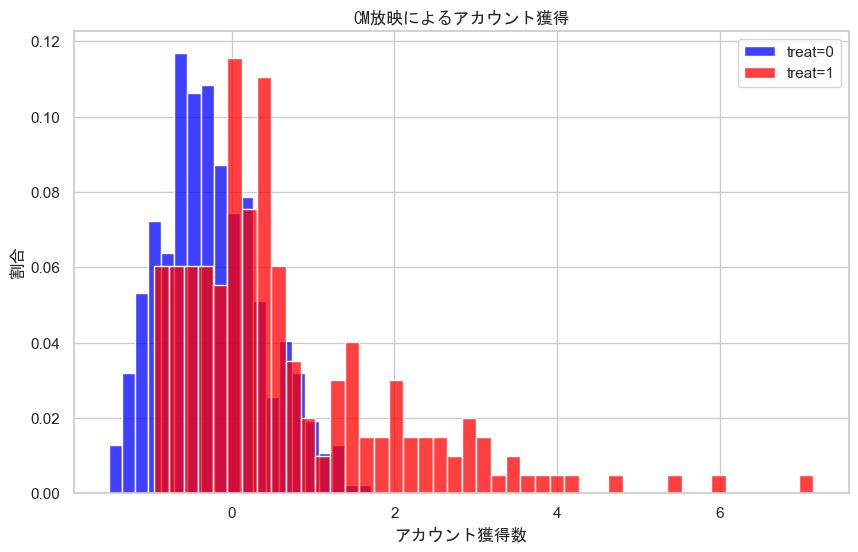

In [35]:
sns.set(style="whitegrid")

treat_0 = filtered_df[filtered_df['cm_flg'] == 0]
treat_1 = filtered_df[filtered_df['cm_flg'] == 1]
total_samples = len(filtered_df)

plt.figure(figsize=(10, 6))
sns.histplot(treat_0['acc_get_cnt'], color='blue', label='treat=0', stat='probability', bins=20)
sns.histplot(treat_1['acc_get_cnt'], color='red', label='treat=1', stat='probability', bins=45)

plt.title('CM放映によるアカウント獲得', fontname="MS Gothic")
plt.xlabel('アカウント獲得数', fontname="MS Gothic")
plt.ylabel('割合', fontname="MS Gothic")
plt.legend()
plt.show()

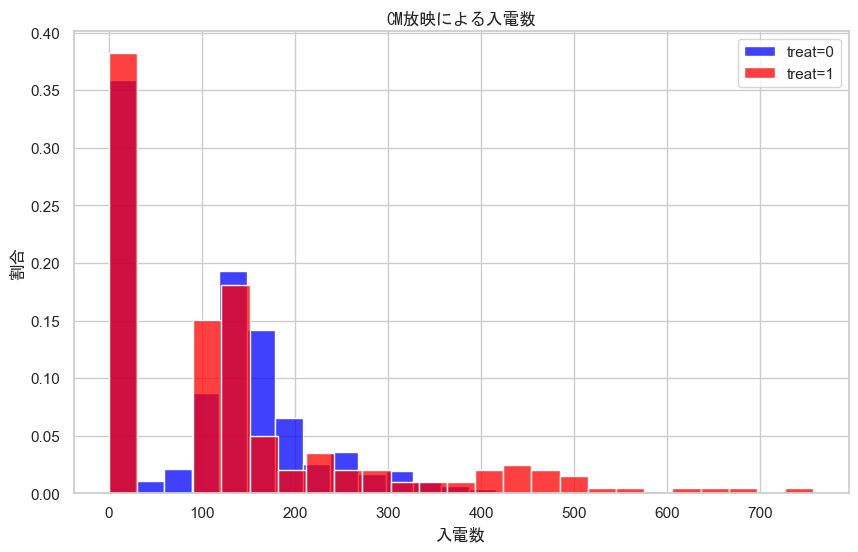

In [36]:
import seaborn as sns
treat_0 = filtered_df[filtered_df['cm_flg'] == 0]
treat_1 = filtered_df[filtered_df['cm_flg'] == 1]
total_samples = len(filtered_df)

plt.figure(figsize=(10, 6))
sns.histplot(treat_0['call_num'], color='blue', label='treat=0', stat='probability', bins=20)
sns.histplot(treat_1['call_num'], color='red', label='treat=1', stat='probability', bins=25)

plt.title('CM放映による入電数', fontname="MS Gothic")
plt.xlabel('入電数', fontname="MS Gothic")
plt.ylabel('割合', fontname="MS Gothic")

plt.legend()
plt.show()

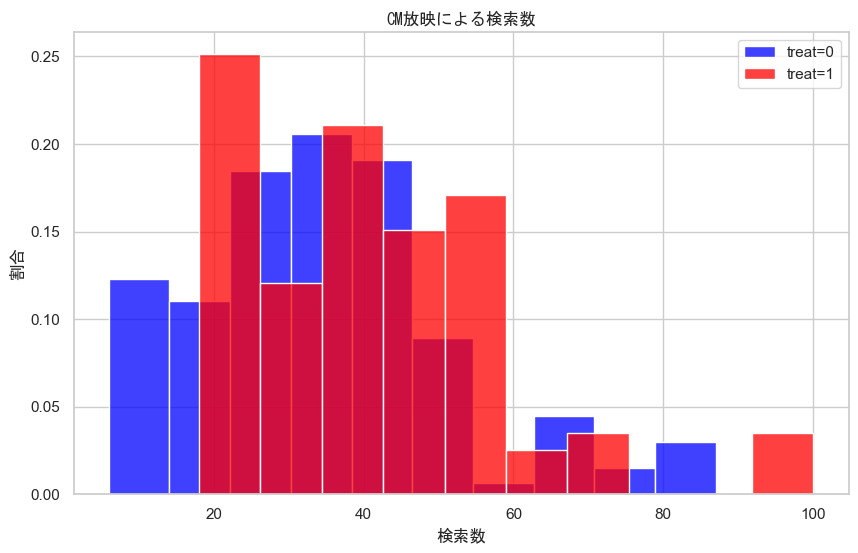

In [37]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import seaborn as sns
sns.set(style="whitegrid")

treat_0 = filtered_df[filtered_df['cm_flg'] == 0]
treat_1 = filtered_df[filtered_df['cm_flg'] == 1]
total_samples = len(filtered_df)

plt.figure(figsize=(10, 6))
sns.histplot(treat_0['search_cnt'], color='blue', label='treat=0', stat='probability', bins=10)
sns.histplot(treat_1['search_cnt'], color='red', label='treat=1', stat='probability', bins=10)

plt.title('CM放映による検索数', fontname="MS Gothic")
plt.xlabel('検索数', fontname="MS Gothic")
plt.ylabel('割合', fontname="MS Gothic")

plt.legend()
plt.show()

In [38]:
average_search_cnt = filtered_df.groupby('cm_flg')['search_cnt'].mean()
average_call_num = filtered_df.groupby('cm_flg')['call_num'].mean()
average_acc_get_cnt = filtered_df.groupby('cm_flg')['acc_get_cnt'].mean()
print(average_search_cnt)
print(average_call_num)
print(average_acc_get_cnt)

cm_flg
0    34.611465
1    41.456853
Name: search_cnt, dtype: float64
cm_flg
0    107.278132
1    138.276382
Name: call_num, dtype: float64
cm_flg
0   -0.247681
1    0.702629
Name: acc_get_cnt, dtype: float64


In [39]:
filtered_df.columns

Index(['cdr_date', 'call_num', 'acc_get_cnt', 'dow', 'dow_name', 'woy', 'wom',
       'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag',
       'holiday_name', 'cm_flg', 'search_cnt', 'days_from_start',
       'previous_acc_get_cnt', 'previous_search_cnt'],
      dtype='object')

In [40]:
X = sm.add_constant(filtered_df[['cm_flg','call_num',
       'day_before_holiday_flag', 'holiday_flag',
       'holiday_name',  'search_cnt']])
y = filtered_df['acc_get_cnt']

model = sm.OLS(y, X)
result = model.fit()

In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            acc_get_cnt   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     206.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          7.86e-148
Time:                        00:06:32   Log-Likelihood:                -602.52
No. Observations:                 670   AIC:                             1219.
Df Residuals:                     663   BIC:                             1251.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.1888      0.066    -18.002      0.000      -1.319      -1.059
cm_flg                      0.7186      0.052     13.891      0.000       0.617       0.820
call_num                    0.0056      0.000     20.219      0.000       0.005       0.006
day_before_holiday_flag     0.0772      0.052      1.482      0.139      -0.025       0.180
holiday_flag                0.0886      0.073      1.213      0.226      -0.055       0.232
holiday_name               -0.0249      0.108     -0.231      0.817      -0.236       0.187
search_cnt                  0.0083      0.001      5.932      0.000       0.006       0.011
==============================================================================
Omnibus:                      165.095   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.773
Skew:                           1.145   Prob(JB):                    2.07e-121
Kurtosis:                       6.829   Cond. No.                         819.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
import dowhy
from dowhy import CausalModel

# Create a causal model
model = CausalModel(
    data=filtered_df,
    treatment='cm_flg',
    outcome='acc_get_cnt',
    common_causes=['call_num', 'day_before_holiday_flag', 'holiday_flag', 'holiday_name', 'search_cnt']
)

# Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Estimate the causal effect
estimate = model.estimate_effect(identified_estimand, method_name='backdoor.propensity_score_matching')

# Refute the estimated effect
refute_results = model.refute_estimate(identified_estimand, estimate, method_name='random_common_cause')

# Print the results
print(estimate)
print(refute_results)

C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dowhy\causal_estimators\propensity_score_estimator.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.propensity_score_column] = self.propensity_score_model.predict_proba(


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                          ↪
─────────(E[acc_get_cnt|call_num,search_cnt,day_before_holiday_flag,holiday_fl ↪
d[cm_flg]                                                                      ↪

↪                  
↪ ag,holiday_name])
↪                  
Estimand assumption 1, Unconfoundedness: If U→{cm_flg} and U→acc_get_cnt then P(acc_get_cnt|cm_flg,call_num,search_cnt,day_before_holiday_flag,holiday_flag,holiday_name,U) = P(acc_get_cnt|cm_flg,call_num,search_cnt,day_before_holiday_flag,holiday_flag,holiday_name)

## Realized estimand
b: acc_get_cnt~cm_flg+call_num+search_cnt+day_before_holiday_flag+holiday_flag+holiday_name
Target units: ate

## Estimate
Mean value: 0.6555636175154912

Refute: Add a random common cause
Estimated effect:0.6555636175154912
New effect:0.6555636175154

In [43]:
filtered_df['cm_flg_consecutive'] = (filtered_df['cm_flg'] == 1) & (filtered_df['cm_flg'].shift(1) == 1)
filtered_df['cm_flg_consecutive'] = filtered_df['cm_flg_consecutive'].astype(int)



filtered_df

C:\Users\81803\AppData\Local\Temp\ipykernel_23428\493235275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cm_flg_consecutive'] = (filtered_df['cm_flg'] == 1) & (filtered_df['cm_flg'].shift(1) == 1)
C:\Users\81803\AppData\Local\Temp\ipykernel_23428\493235275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cm_flg_consecutive'] = filtered_df['cm_flg_consecutive'].astype(int)


,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt,days_from_start,previous_acc_get_cnt,previous_search_cnt,propensity_score,cm_flg_consecutive
92,2018-06-01,183.0,-0.282652,5.0,6,22.0,1.0,152.0,2018.0,1,0,0,0,6.000000,0,0.000000,0.000000,0.205894,0
93,2018-06-02,0.0,-1.025720,6.0,7,22.0,1.0,153.0,2018.0,1,1,0,0,6.000000,1,-0.282652,6.000000,0.200008,0
94,2018-06-03,0.0,-1.075258,7.0,1,22.0,2.0,154.0,2018.0,0,1,0,0,18.000000,2,-1.025720,6.000000,0.217966,0
95,2018-06-04,213.0,-0.220730,1.0,2,23.0,2.0,155.0,2018.0,0,0,0,0,18.000000,3,-1.075258,18.000000,0.238834,0
96,2018-06-05,143.0,-0.431266,2.0,3,23.0,2.0,156.0,2018.0,0,0,0,0,18.000000,4,-0.220730,18.000000,0.205767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2020-03-27,127.0,0.534723,5.0,6,13.0,4.0,87.0,2019.0,1,0,0,1,25.000000,665,0.348956,25.000000,0.237244,1
758,2020-03-28,0.0,-0.220730,6.0,7,13.0,4.0,88.0,2019.0,1,1,0,1,25.000000,666,0.534723,25.000000,0.259034,1
759,2020-03-29,0.0,-0.641802,7.0,1,13.0,5.0,89.0,2019.0,0,1,0,1,20.000000,667,-0.220730,25.000000,0.224041,1
760,2020-03-30,134.0,-0.307421,1.0,2,14.0,5.0,90.0,2019.0,0,0,0,1,41.456853,668,-0.641802,20.000000,0.276603,1


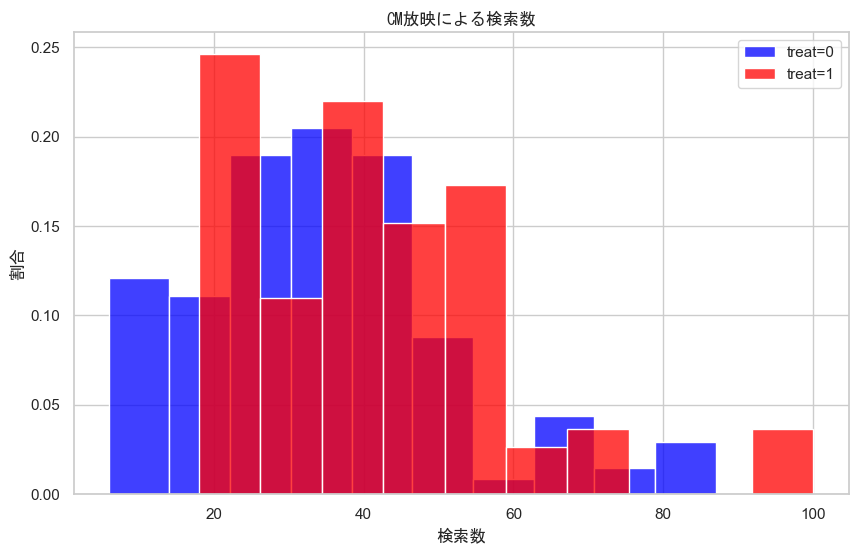

In [44]:
sns.set(style="whitegrid")

treat_0 = filtered_df[filtered_df['cm_flg_consecutive'] == 0]
treat_1 = filtered_df[filtered_df['cm_flg_consecutive'] == 1]
total_samples = len(filtered_df)

plt.figure(figsize=(10, 6))
sns.histplot(treat_0['search_cnt'], color='blue', label='treat=0', stat='probability', bins=10)
sns.histplot(treat_1['search_cnt'], color='red', label='treat=1', stat='probability', bins=10)

plt.title('CM放映による検索数', fontname="MS Gothic")
plt.xlabel('検索数', fontname="MS Gothic")
plt.ylabel('割合', fontname="MS Gothic")

plt.legend()
plt.show()


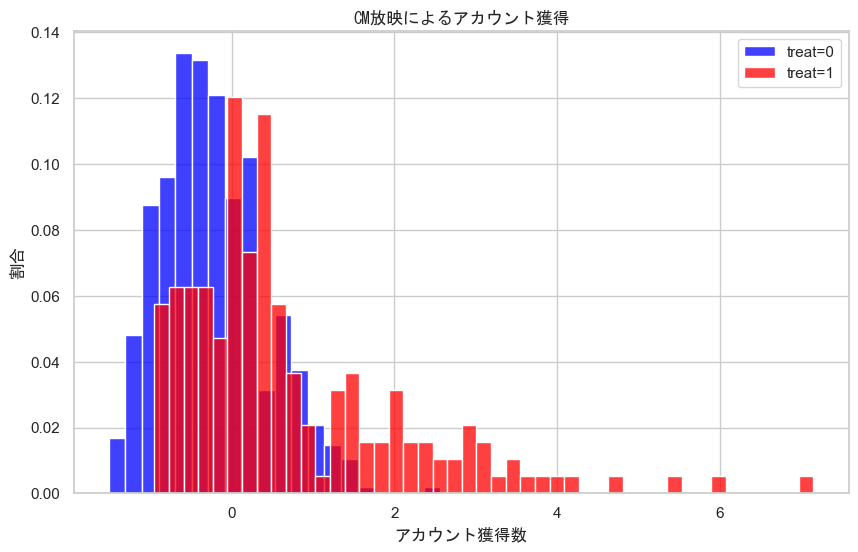

In [45]:
sns.set(style="whitegrid")

treat_0 = filtered_df[filtered_df['cm_flg_consecutive'] == 0]
treat_1 = filtered_df[filtered_df['cm_flg_consecutive'] == 1]
total_samples = len(filtered_df)

plt.figure(figsize=(10, 6))
sns.histplot(treat_0['acc_get_cnt'], color='blue', label='treat=0', stat='probability', bins=20)
sns.histplot(treat_1['acc_get_cnt'], color='red', label='treat=1', stat='probability', bins=45)

plt.title('CM放映によるアカウント獲得', fontname="MS Gothic")
plt.xlabel('アカウント獲得数', fontname="MS Gothic")
plt.ylabel('割合', fontname="MS Gothic")
plt.legend()
plt.show()

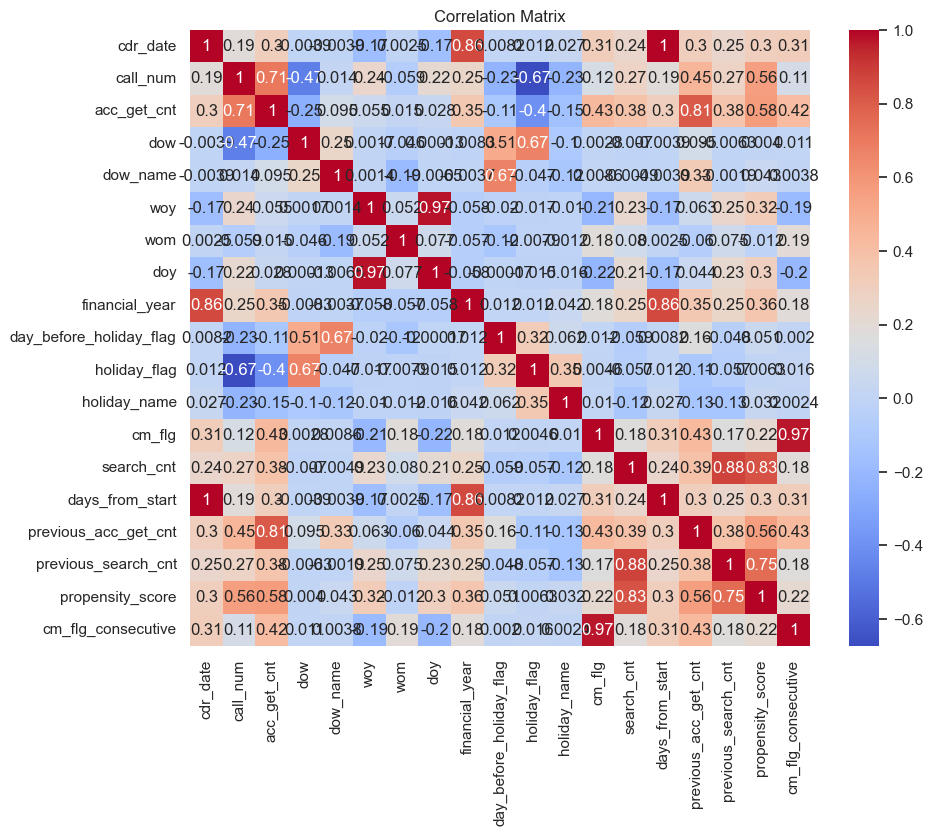

In [46]:
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22679 (\N{CJK UNIFIED IDEOGRAPH-5897}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

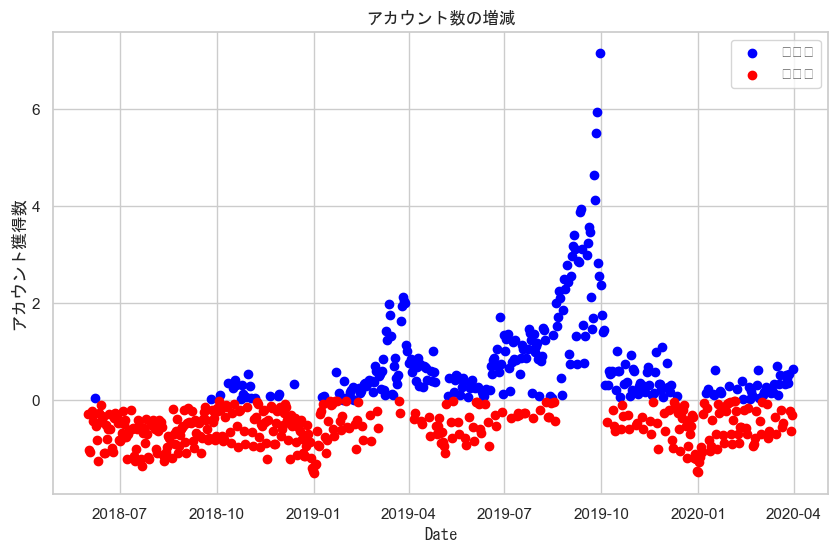

In [47]:
# プラスの日とマイナスの日に分ける
positive_days = filtered_df[filtered_df['acc_get_cnt'] >= 0]
negative_days = filtered_df[filtered_df['acc_get_cnt'] < 0]

# 可視化
plt.figure(figsize=(10, 6))
plt.scatter(positive_days['cdr_date'], positive_days['acc_get_cnt'], color='blue', label='増加日')
plt.scatter(negative_days['cdr_date'], negative_days['acc_get_cnt'], color='red', label='減少日')

plt.xlabel('Date',fontname="MS Gothic")
plt.ylabel('アカウント獲得数',fontname="MS Gothic")
plt.title('アカウント数の増減',fontname="MS Gothic")
plt.legend()
plt.show()

In [48]:
print(positive_days.count())
print(negative_days.count())

cdr_date                   285
call_num                   285
acc_get_cnt                285
dow                        285
dow_name                   285
woy                        285
wom                        285
doy                        285
financial_year             285
day_before_holiday_flag    285
holiday_flag               285
holiday_name               285
cm_flg                     285
search_cnt                 285
days_from_start            285
previous_acc_get_cnt       285
previous_search_cnt        285
propensity_score           285
cm_flg_consecutive         285
dtype: int64
cdr_date                   385
call_num                   385
acc_get_cnt                385
dow                        385
dow_name                   385
woy                        385
wom                        385
doy                        385
financial_year             385
day_before_holiday_flag    385
holiday_flag               385
holiday_name               385
cm_flg                    

In [49]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 92 to 761
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cdr_date                 670 non-null    datetime64[ns]
 1   call_num                 670 non-null    float64       
 2   acc_get_cnt              670 non-null    float64       
 3   dow                      670 non-null    float64       
 4   dow_name                 670 non-null    int64         
 5   woy                      670 non-null    float64       
 6   wom                      670 non-null    float64       
 7   doy                      670 non-null    float64       
 8   financial_year           670 non-null    float64       
 9   day_before_holiday_flag  670 non-null    int32         
 10  holiday_flag             670 non-null    int32         
 11  holiday_name             670 non-null    int64         
 12  cm_flg                   670 non-null   

In [50]:

filtered_df

,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt,days_from_start,previous_acc_get_cnt,previous_search_cnt,propensity_score,cm_flg_consecutive
92,2018-06-01,183.0,-0.282652,5.0,6,22.0,1.0,152.0,2018.0,1,0,0,0,6.000000,0,0.000000,0.000000,0.205894,0
93,2018-06-02,0.0,-1.025720,6.0,7,22.0,1.0,153.0,2018.0,1,1,0,0,6.000000,1,-0.282652,6.000000,0.200008,0
94,2018-06-03,0.0,-1.075258,7.0,1,22.0,2.0,154.0,2018.0,0,1,0,0,18.000000,2,-1.025720,6.000000,0.217966,0
95,2018-06-04,213.0,-0.220730,1.0,2,23.0,2.0,155.0,2018.0,0,0,0,0,18.000000,3,-1.075258,18.000000,0.238834,0
96,2018-06-05,143.0,-0.431266,2.0,3,23.0,2.0,156.0,2018.0,0,0,0,0,18.000000,4,-0.220730,18.000000,0.205767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2020-03-27,127.0,0.534723,5.0,6,13.0,4.0,87.0,2019.0,1,0,0,1,25.000000,665,0.348956,25.000000,0.237244,1
758,2020-03-28,0.0,-0.220730,6.0,7,13.0,4.0,88.0,2019.0,1,1,0,1,25.000000,666,0.534723,25.000000,0.259034,1
759,2020-03-29,0.0,-0.641802,7.0,1,13.0,5.0,89.0,2019.0,0,1,0,1,20.000000,667,-0.220730,25.000000,0.224041,1
760,2020-03-30,134.0,-0.307421,1.0,2,14.0,5.0,90.0,2019.0,0,0,0,1,41.456853,668,-0.641802,20.000000,0.276603,1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 469, number of used features: 15
[LightGBM] [Info] Start training from score 116.669510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

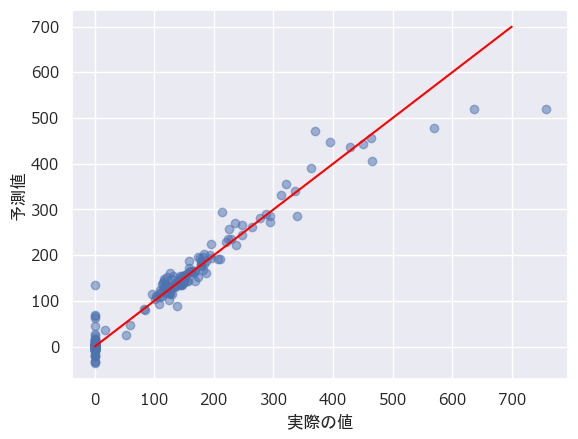

In [521]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


#予測ターゲットの格納（住宅価格：A列）
train_df = filtered_df[['dow', 'dow_name', 'woy', 'wom',
       'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag',
       'holiday_name', 'cm_flg', 'days_from_start',
       'previous_acc_get_cnt', 'propensity_score', 'cm_flg_consecutive',
       'previous_search_cnt']]#call_num,previous_acc_get_cnt
target_df = filtered_df[['call_num']]

#モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)



dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)


#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 700, 700), np.linspace(0, 700, 700), "red")
plt.xlabel('実際の値' ,fontname="MS Gothic")
plt.ylabel('予測値',  fontname="MS Gothic")
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE:", rmse)

# MAEを計算
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)


RMSE: 27.483454153937206
MAE: 15.460531812388309


C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 469, number of used features: 15
[LightGBM] [Info] Start training from score 120.157783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

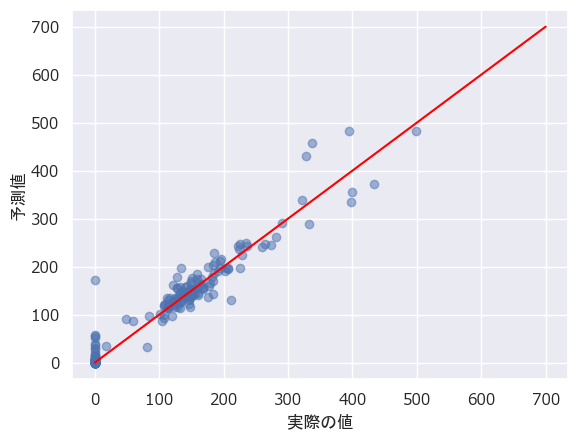

RMSE: 26.063635945041803
MAE: 14.783183605046776


C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [92]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


train_df = filtered_df[['dow', 'dow_name', 'woy', 'wom',
       'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag',
       'holiday_name', 'cm_flg', 'days_from_start',
       'previous_acc_get_cnt', 'propensity_score', 'cm_flg_consecutive',
       'previous_search_cnt']]#call_num,previous_acc_get_cnt
target_df = filtered_df[['call_num']]

#モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)



dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)


#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
pred[pred < 0] = 0
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 700, 700), np.linspace(0, 700, 700), "red")
plt.xlabel('実際の値' ,fontname="MS Gothic")
plt.ylabel('予測値',  fontname="MS Gothic")
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE:", rmse)

# MAEを計算
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)

In [79]:
pred = model.predict([[5.0,6	,13.0	,4.0	,87.0	,2019.0	,1	,0	,0	,1		,665	,0.348956	,0.237244	,1	,25.000000]])
print(pred)
# ['dow', 'dow_name', 'woy', 'wom',
#        'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag',
#        'holiday_name', 'cm_flg', 'days_from_start',
#        'previous_acc_get_cnt', 'propensity_score', 'cm_flg_consecutive',
#        'previous_search_cnt']

[128.464]


C:\Users\81803\AppData\Local\Temp\ipykernel_23428\4185539324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['previous_call_num'] = filtered_df['call_num'].shift(1)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 469, number of used features: 16
[LightGBM] [Info] Start training from score 112.835821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

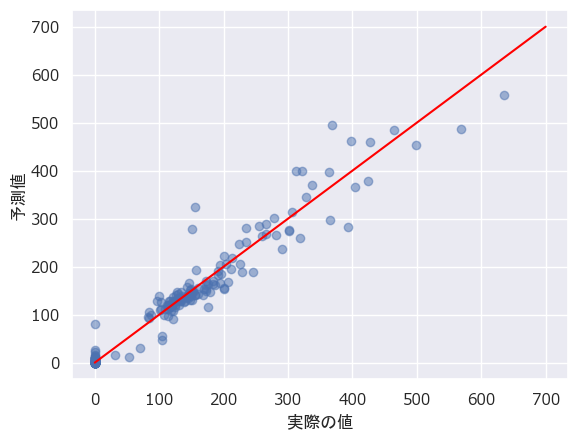

In [71]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
filtered_df['previous_call_num'] = filtered_df['call_num'].shift(1)
filtered_df.loc[92, 'previous_call_num'] = 0

#予測ターゲットの格納（住宅価格：A列）
train_df = filtered_df[['dow', 'dow_name', 'woy', 'wom',
       'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag',
       'holiday_name', 'cm_flg', 'days_from_start',
       'previous_acc_get_cnt', 'propensity_score', 'cm_flg_consecutive',
       'previous_search_cnt','previous_call_num']]#call_num,previous_acc_get_cnt
target_df = filtered_df[['call_num']]

#モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)



dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)


#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
pred[pred < 0] = 0
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 700, 700), np.linspace(0, 700, 700), "red")
plt.xlabel('実際の値' ,fontname="MS Gothic")
plt.ylabel('予測値',  fontname="MS Gothic")
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE:", rmse)

# MAEを計算
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)

RMSE: 30.005289431562918
MAE: 17.053487945671634


C:\Users\81803\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
filtered_df

,cdr_date,call_num,acc_get_cnt,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,cm_flg,search_cnt,days_from_start,previous_acc_get_cnt,previous_search_cnt,propensity_score,cm_flg_consecutive,previous_call_num
92,2018-06-01,183.0,-0.282652,5.0,6,22.0,1.0,152.0,2018.0,1,0,0,0,6.000000,0,0.000000,0.000000,0.205894,0,0.0
93,2018-06-02,0.0,-1.025720,6.0,7,22.0,1.0,153.0,2018.0,1,1,0,0,6.000000,1,-0.282652,6.000000,0.200008,0,183.0
94,2018-06-03,0.0,-1.075258,7.0,1,22.0,2.0,154.0,2018.0,0,1,0,0,18.000000,2,-1.025720,6.000000,0.217966,0,0.0
95,2018-06-04,213.0,-0.220730,1.0,2,23.0,2.0,155.0,2018.0,0,0,0,0,18.000000,3,-1.075258,18.000000,0.238834,0,0.0
96,2018-06-05,143.0,-0.431266,2.0,3,23.0,2.0,156.0,2018.0,0,0,0,0,18.000000,4,-0.220730,18.000000,0.205767,0,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2020-03-27,127.0,0.534723,5.0,6,13.0,4.0,87.0,2019.0,1,0,0,1,25.000000,665,0.348956,25.000000,0.237244,1,114.0
758,2020-03-28,0.0,-0.220730,6.0,7,13.0,4.0,88.0,2019.0,1,1,0,1,25.000000,666,0.534723,25.000000,0.259034,1,127.0
759,2020-03-29,0.0,-0.641802,7.0,1,13.0,5.0,89.0,2019.0,0,1,0,1,20.000000,667,-0.220730,25.000000,0.224041,1,0.0
760,2020-03-30,134.0,-0.307421,1.0,2,14.0,5.0,90.0,2019.0,0,0,0,1,41.456853,668,-0.641802,20.000000,0.276603,1,0.0


In [391]:
from sklearn.model_selection import train_test_split

# 目的変数と説明変数に分割
X = filtered_df[['cdr_date', 'call_num', 'dow', 'dow_name', 'woy', 'wom',
       'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag',
       'holiday_name', 'cm_flg', 'search_cnt']]
y = filtered_df[['acc_get_cnt']]
# # 訓練データと評価データに分割

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [432]:
# XGBClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(y_test)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_test, xgb_valid_pred)}")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207], got [-1.509e+00 -1.484e+00 -1.472e+00 -1.348e+00 -1.286e+00 -1.261e+00
 -1.249e+00 -1.224e+00 -1.211e+00 -1.199e+00 -1.187e+00 -1.174e+00
 -1.162e+00 -1.150e+00 -1.137e+00 -1.125e+00 -1.112e+00 -1.100e+00
 -1.088e+00 -1.075e+00 -1.063e+00 -1.026e+00 -1.013e+00 -1.001e+00
 -9.886e-01 -9.762e-01 -9.638e-01 -9.514e-01 -9.390e-01 -9.266e-01
 -9.019e-01 -8.895e-01 -8.771e-01 -8.647e-01 -8.523e-01 -8.400e-01
 -8.276e-01 -8.152e-01 -8.028e-01 -7.904e-01 -7.533e-01 -7.409e-01
 -7.285e-01 -7.161e-01 -7.037e-01 -6.913e-01 -6.790e-01 -6.418e-01
 -6.294e-01 -6.170e-01 -6.046e-01 -5.923e-01 -5.799e-01 -5.675e-01
 -5.551e-01 -5.427e-01 -5.303e-01 -5.180e-01 -5.056e-01 -4.932e-01
 -4.808e-01 -4.684e-01 -4.560e-01 -4.437e-01 -4.313e-01 -4.189e-01
 -4.065e-01 -3.941e-01 -3.817e-01 -3.693e-01 -3.570e-01 -3.446e-01
 -3.322e-01 -3.198e-01 -3.074e-01 -2.950e-01 -2.703e-01 -2.579e-01
 -2.455e-01 -2.331e-01 -2.207e-01 -2.083e-01 -1.960e-01 -1.836e-01
 -1.712e-01 -1.588e-01 -1.464e-01 -1.217e-01 -1.093e-01 -9.689e-02
 -8.450e-02 -7.212e-02 -5.973e-02 -4.735e-02 -3.496e-02 -2.258e-02
 -1.019e-02  2.191e-03  1.458e-02  2.696e-02  3.934e-02  5.173e-02
  6.411e-02  7.650e-02  8.888e-02  1.013e-01  1.137e-01  1.260e-01
  1.384e-01  1.508e-01  1.632e-01  1.756e-01  1.880e-01  2.003e-01
  2.127e-01  2.375e-01  2.499e-01  2.623e-01  2.746e-01  2.870e-01
  2.994e-01  3.118e-01  3.242e-01  3.366e-01  3.490e-01  3.613e-01
  3.737e-01  3.861e-01  3.985e-01  4.109e-01  4.233e-01  4.356e-01
  4.480e-01  4.976e-01  5.100e-01  5.223e-01  5.347e-01  5.471e-01
  5.719e-01  5.843e-01  5.966e-01  6.090e-01  6.338e-01  6.462e-01
  6.586e-01  6.710e-01  6.957e-01  7.081e-01  7.329e-01  7.453e-01
  7.576e-01  7.700e-01  8.072e-01  8.196e-01  8.320e-01  8.443e-01
  8.567e-01  8.691e-01  9.063e-01  9.558e-01  9.806e-01  9.929e-01
  1.005e+00  1.018e+00  1.042e+00  1.104e+00  1.142e+00  1.191e+00
  1.228e+00  1.241e+00  1.265e+00  1.315e+00  1.340e+00  1.352e+00
  1.364e+00  1.389e+00  1.439e+00  1.464e+00  1.525e+00  1.538e+00
  1.686e+00  1.711e+00  1.748e+00  1.761e+00  1.847e+00  1.934e+00
  1.984e+00  1.996e+00  2.008e+00  2.033e+00  2.095e+00  2.256e+00
  2.368e+00  2.504e+00  2.776e+00  2.875e+00  3.123e+00  3.173e+00
  3.235e+00  3.408e+00  3.470e+00  3.557e+00  3.879e+00  3.928e+00
  4.126e+00  4.634e+00  5.501e+00  5.947e+00]

In [344]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 特徴量と目的変数の設定
X = filtered_df[['cdr_date', 'call_num', 'dow', 'dow_name', 'woy', 'wom',
       'doy', 'financial_year', 'day_before_holiday_flag', 'holiday_flag',
       'holiday_name', 'cm_flg', 'search_cnt']]
y = filtered_df['acc_get_cnt']

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMのデータセットに変換
train_data = lgb.Dataset(X_train, label=y_train)

# ハイパーパラメータの設定
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# モデルの学習
model = lgb.train(params, train_data, 0)

# テストデータの予測
y_pred = model.predict(X_test)

# RMSEの計算
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float32DType'>)

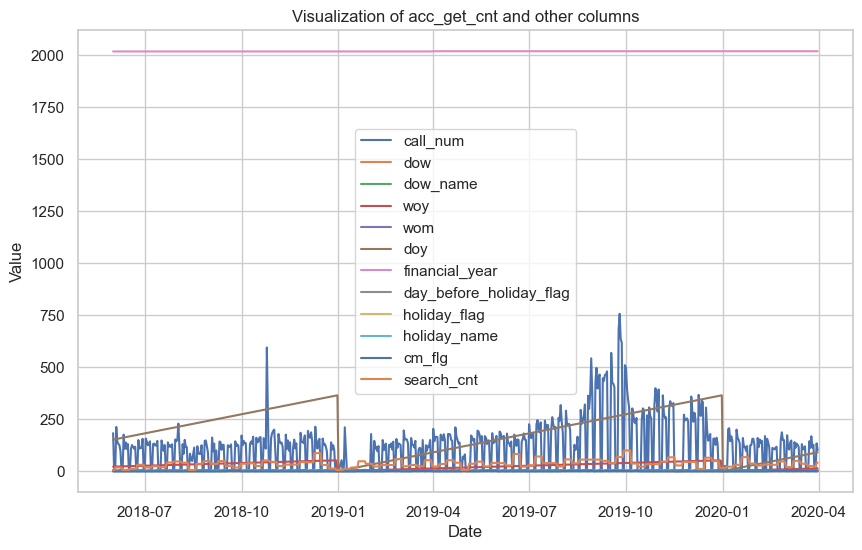

In [343]:
import matplotlib.pyplot as plt

# Plotting the acc_get_cnt variable against other columns
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X['cdr_date'], X['call_num'], label='call_num')
ax.plot(X['cdr_date'], X['dow'], label='dow')
ax.plot(X['cdr_date'], X['dow_name'], label='dow_name')
ax.plot(X['cdr_date'], X['woy'], label='woy')
ax.plot(X['cdr_date'], X['wom'], label='wom')
ax.plot(X['cdr_date'], X['doy'], label='doy')
ax.plot(X['cdr_date'], X['financial_year'], label='financial_year')
ax.plot(X['cdr_date'], X['day_before_holiday_flag'], label='day_before_holiday_flag')
ax.plot(X['cdr_date'], X['holiday_flag'], label='holiday_flag')
ax.plot(X['cdr_date'], X['holiday_name'], label='holiday_name')
ax.plot(X['cdr_date'], X['cm_flg'], label='cm_flg')
ax.plot(X['cdr_date'], X['search_cnt'], label='search_cnt')

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Visualization of acc_get_cnt and other columns')
ax.legend()

plt.show()